<a href="https://colab.research.google.com/github/msrdinesh/100-Days-of-coding/blob/master/Housing_data_predictionend_to_end_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello, This is my first end to end project of machine learning. I have doing this by read the book "Hands on machine learning with scikitlearn and tensorflow"
This ca be a good tutorial for a complete beginner. As I am a beginner and doint the project step by step reading the book..


First, We shall download the data set..

It is preferable to create a small func‐
tion to do download the data. It is useful in particular if data changes regularly, as it allows you to
write a small script that you can run whenever you need to fetch the latest data (or
you can set up a scheduled job to do that automatically at regular intervals). Auto‐
mating the process of fetching the data is also useful if you need to install the dataset
on multiple machines.

In [0]:
# here's the function for downloading the data.. I just copy pasted it from the book
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"


In [0]:

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
  if not os.path.isdir(housing_path):
    os.makedirs(housing_path)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()

In [0]:
fetch_housing_data()

When ever we call fetch_housing_data it creates datasets/housing directory  in your workspace and downloads "housing.tgz" and extracts housing.csv in this directory

Now we have to load the data set into pandas to perform various operations with data the following function load_housing_data does that!


In [0]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)

In [0]:
#fetching the data using the function and loadng it into data frame housing
fetch_housing_data()
housing = load_housing_data()

We will just have a look at data by looking head() method.. 

In [27]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


info() method gives information of the data

In [12]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Some features to be observed from lookin at the info()
1. There are 20640 instances of the data set
2. All the features excepts ocean_proximity fare numbers(float64)
3. There are missing vaues in total_rooms. We have to take care of it

describe() method gives the summary of the numericals of the data

In [14]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Another measure of looking at dataset is by drawing histograms. To know how the data is spread over the ranges. This can be obtained by hist() method on the dataframe


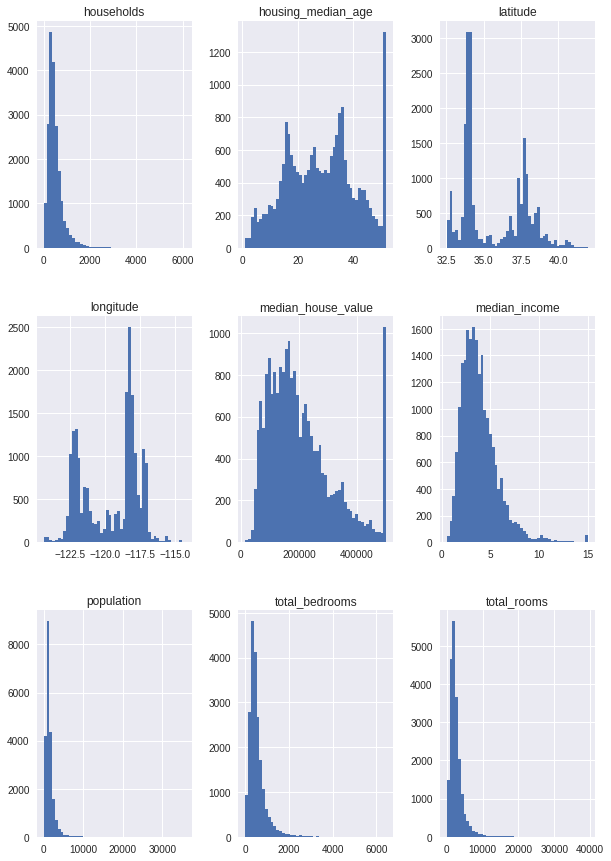

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(10,15))
plt.show()

Before going any further we will put the test set asid and never look at it. For doing this scikit-learn's train_test_split is very useful

In [0]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=35)

But dividing in this random manner does not divide train and test set properly. So we adapt stratified train,test split. Here's the process to do it

As we look at the histogram of median_income properly most of the value ranges from 2-5. Some value ranges are above 6. we divide the data by 1.5 to get fixed number of classes and shuffle them accordingly.The following code does that.

In [0]:
#first rounding of the median_income value
import numpy as np
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)

In [45]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [0]:
# making all the values above 5 as 5
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=35)
for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

Now, Let's check the difference between the distributions of complete random splitting and stratified splitting.

In [50]:
housing["income_cat"].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [51]:
strat_train_set["income_cat"].value_counts()/len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [53]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

You can see that the stratified train and test split have similar distributions as of housing dataset. This is very important consideration


Now we will drop the income_cat column so that the axis data looks same as previous

In [57]:
strat_train_set.drop(["income_cat"],axis=1,inplace=True)
strat_test_set.drop(["income_cat"],axis=1,inplace=True)

ValueError: ignored

In [58]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
18417,-121.84,37.27,16.0,2429.0,387.0,1293.0,363.0,5.5000,253200.0,<1H OCEAN
17644,-121.90,37.26,20.0,4447.0,661.0,2062.0,660.0,6.8088,283300.0,<1H OCEAN
5807,-118.27,34.14,10.0,1060.0,332.0,1025.0,288.0,3.0074,175000.0,<1H OCEAN
15269,-117.30,33.07,14.0,2670.0,426.0,1034.0,407.0,6.4247,295100.0,NEAR OCEAN
20287,-119.17,34.17,42.0,1411.0,300.0,1295.0,339.0,2.6667,164900.0,NEAR OCEAN


In [59]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
420,-122.26,37.89,52.0,3706.0,531.0,1205.0,504.0,6.6828,370900.0,NEAR BAY
13640,-117.32,34.06,52.0,802.0,160.0,564.0,131.0,2.1591,63500.0,INLAND
8480,-118.32,33.92,35.0,1281.0,219.0,710.0,184.0,4.8304,152800.0,<1H OCEAN
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
15060,-116.93,32.79,19.0,3354.0,NaN,1948.0,682.0,3.0192,142300.0,<1H OCEAN


Upto now we just have taken general insights of the data. From now we go into deeper into the analysis so that we can observe relevant information.First we shall make a copy of the data and store so that original data is not effected

In [0]:
housing = strat_train_set.copy()

As lattitude and logitute give the position,its good to have a scatter plot between them to denote varrious areas considered in there.

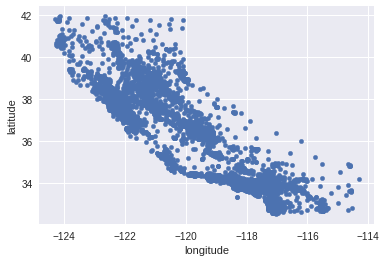

In [67]:
housing.plot(kind="scatter",x="longitude",y="latitude")

To view more properly we put alpha =0.1 to look into densities properly

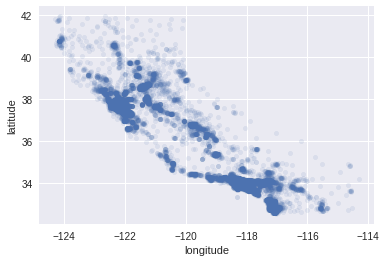

In [68]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

Plotting the graph in more meaningful way. The radius represents district's population and color represents median_house_value

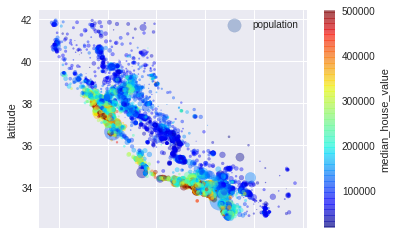

In [70]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population",
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

Now we shall see the correlelation of various features

In [0]:
corr_matrix = housing.corr()

In [76]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.686783
total_rooms           0.137209
housing_median_age    0.103463
households            0.068669
total_bedrooms        0.052196
population           -0.022340
longitude            -0.050106
latitude             -0.140513
Name: median_house_value, dtype: float64

This shows that there is strong correlation between median_house_value and median_income 

Another way of representing correlation is using pandas scatter plot

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feaad9a6710>,
      dtype=object)

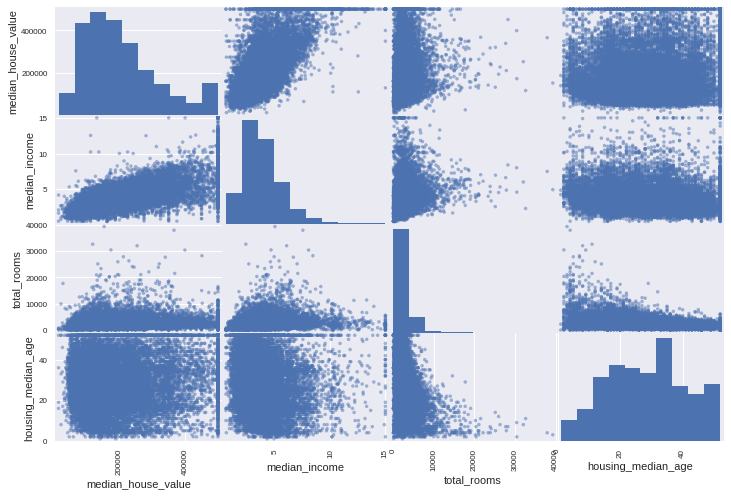

In [77]:
from pandas.tools.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

One last thing to do is to setting out attribute combinations to get more correlated feature:
1. The total number of rooms is not useful until we know number of households live in that area
2. The total number of bed rooms in not useful until we know number of house
3. Population per household can be considered as a a good metric(That is number of people in a house)

In [0]:
housing["rooms_per_hous_holds"] = housing["population"]/housing["households"]
housing["bed_rooms_per_hous"] = housing["total_rooms"]/housing["total_bedrooms"]

In [0]:
corr_matrix = housing.corr()

In [83]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value      1.000000
median_income           0.686783
bed_rooms_per_hous      0.382437
total_rooms             0.137209
housing_median_age      0.103463
households              0.068669
total_bedrooms          0.052196
rooms_per_hous_holds   -0.022184
population             -0.022340
longitude              -0.050106
latitude               -0.140513
Name: median_house_value, dtype: float64

Now we got better correlation with bed rooms per house

Now we shall prepare the data for machine learning algorithms. It's better to use functions because they are reproducable and you slowly build libraries so that they can be used for furhter projects

In [0]:
housing_labels = housing["median_house_value"].copy()
housing = housing.drop("median_house_value",axis=1)

we have removed median_house_value as it is the feature to be predicted.. 
Now, we have already seen that the total_number_of_rooms contains some false values
There are 3 options we have to deal with this situattion
1. Get rid of the feature
2. Get rid of correstponding attribute
3. Fill the empty values with median

In [92]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_hous_holds,bed_rooms_per_hous
420,-122.26,37.89,52.0,3706.0,531.0,1205.0,504.0,6.6828,NEAR BAY,2.390873,6.979284
13640,-117.32,34.06,52.0,802.0,160.0,564.0,131.0,2.1591,INLAND,4.305344,5.012500
8480,-118.32,33.92,35.0,1281.0,219.0,710.0,184.0,4.8304,<1H OCEAN,3.858696,5.849315
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,NEAR BAY,2.403727,NaN
15060,-116.93,32.79,19.0,3354.0,NaN,1948.0,682.0,3.0192,<1H OCEAN,2.856305,NaN


In [0]:
median = housing["total_rooms"].median()
housing["total_rooms"] = housing["total_rooms"].fillna(median)

Before we left the feature Ocean Proximity as it is not an integer. But we can convert into matrix by encoding 

In [107]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_hous_holds,bed_rooms_per_hous
420,-122.26,37.89,52.0,3706.0,531.0,1205.0,504.0,6.6828,NEAR BAY,2.390873,6.979284
13640,-117.32,34.06,52.0,802.0,160.0,564.0,131.0,2.1591,INLAND,4.305344,5.012500
8480,-118.32,33.92,35.0,1281.0,219.0,710.0,184.0,4.8304,<1H OCEAN,3.858696,5.849315
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,NEAR BAY,2.403727,NaN
15060,-116.93,32.79,19.0,3354.0,NaN,1948.0,682.0,3.0192,<1H OCEAN,2.856305,NaN


In [0]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)


In [110]:
housing_cat_encoded

array([3, 1, 0, ..., 1, 1, 4])

In [112]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


Now we will do one hot encoding

In [0]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_one_hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))

In [118]:
housing_cat_one_hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [120]:
housing_cat_one_hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [127]:
!git clone https://github.com/msrdinesh/Machine_learning_projects.git

Cloning into 'Machine_learning_projects'...


In [0]:
!git add .

In [0]:
!git config --global user.name "msrdinesh"

In [0]:
!git config --global user.email "msd11@iitbbs.ac.in"

In [137]:
!git commit -m " i dont know"

On branch master

Initial commit

nothing to commit


In [141]:
!git add Housing_data_predictionend_to_end_project.ipynb

fatal: pathspec 'Housing_data_predictionend_to_end_project.ipynb' did not match any files


In [139]:
!git commit -m "dkfjsdf"

On branch master

Initial commit

nothing to commit
